### The simulation was run with only one seed for the random generator.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import particles

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [79]:
data_direction = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/data_v1/m0/'

import os
di = os.listdir(data_direction)
files = [data_direction+f for f in di if '.DS_Store' not in f]
files

diameters = [d.split('/')[-1].split('_')[1].split('.')[0] for d in files]
diameters

['1000', '1250', '1500', '1750', '2000', '250', '500', '750']

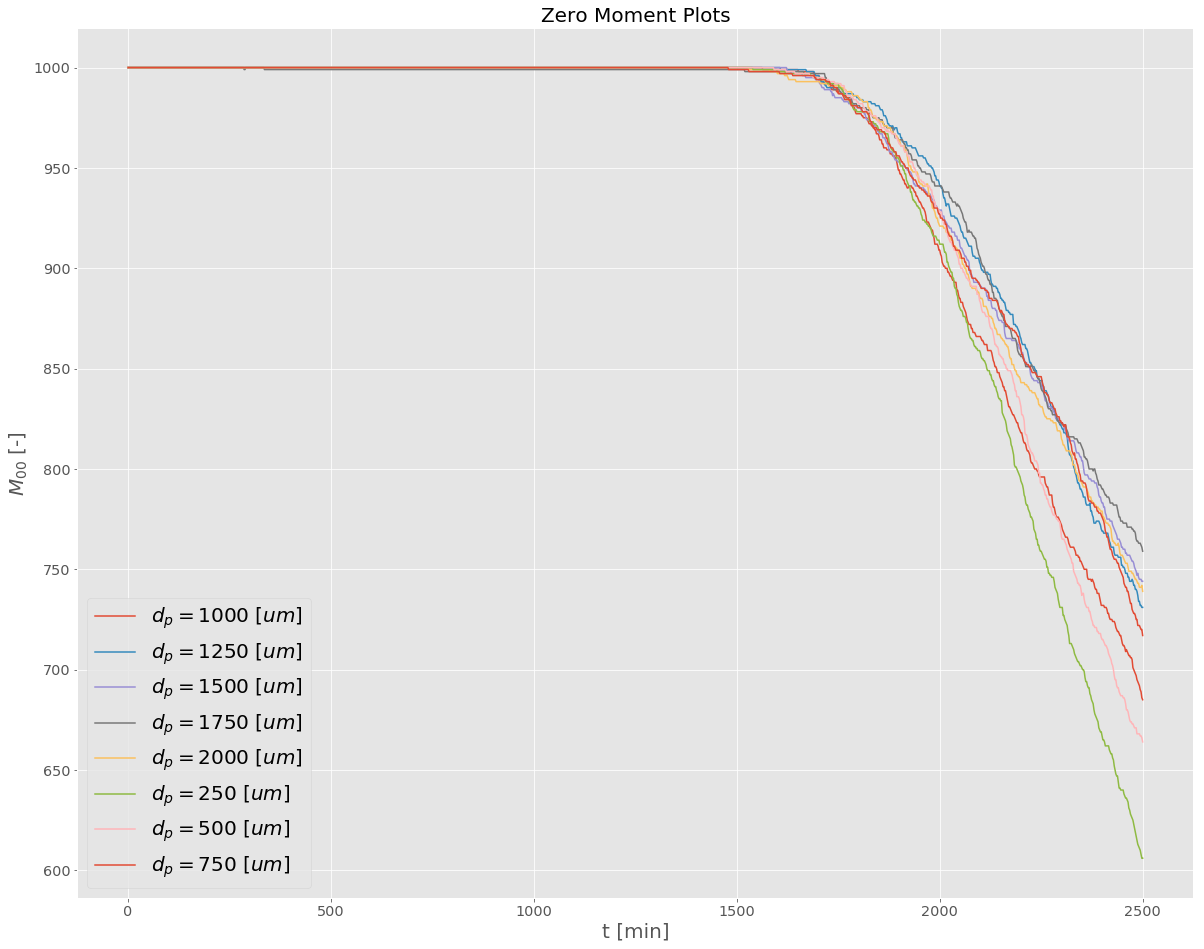

In [81]:
fig, ax = plt.subplots()
dfs =[]
for i, f in enumerate(files):
    df = pd.read_csv(f,index_col=0)
    df.columns = [diameters[i]]
    dfs.append(df)
    df.mean(axis=1).plot(label=r'$d_p=$'+diameters[i]+r' $[um]$', ax=ax)
plt.xlabel('t [min]', fontsize=20)
plt.ylabel(r'$M_{00}$ [-]', fontsize=20)
plt.title('Zero Moment Plots', fontsize=20)
plt.legend(fontsize=20)

In [82]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/0_mom_full.png')

In [83]:
dfa = pd.concat(dfs,axis=1)/1000
dfa.head()

,1000,1250,1500,1750,2000,250,500,750
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [84]:
locs = []
for dp in dfa.columns:
    locs.append(np.where(dfa[dp].values==.970)[0][0])
time_limit_ix = np.min(locs)

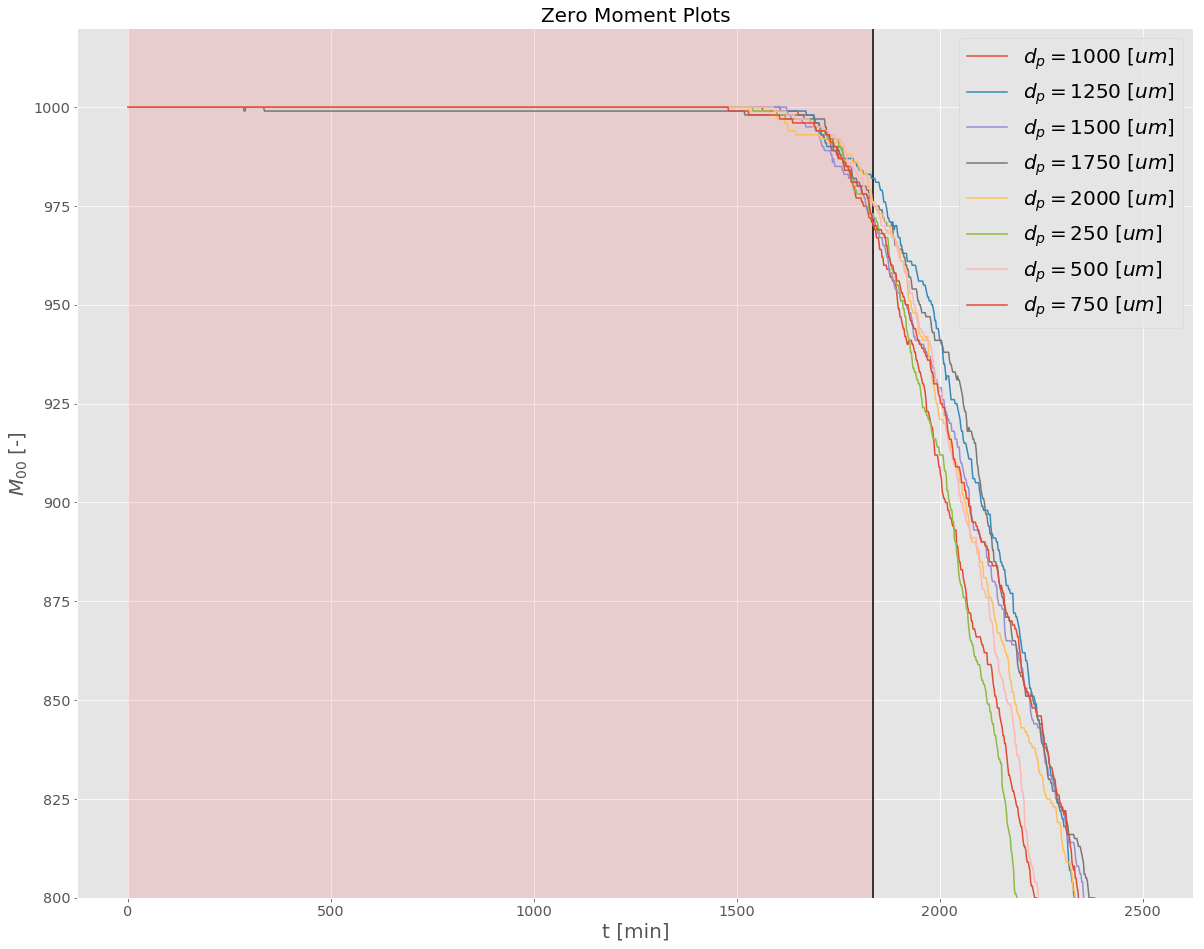

In [85]:
fig, ax = plt.subplots()
dfs =[]
for i, f in enumerate(files):
    df = pd.read_csv(f,index_col=0)
    df.columns = [diameters[i]]
    dfs.append(df)
    df.mean(axis=1).plot(label=r'$d_p=$'+diameters[i]+r' $[um]$', ax=ax)
plt.xlabel('t [min]', fontsize=20)
plt.ylabel(r'$M_{00}$ [-]', fontsize=20)
plt.title('Zero Moment Plots', fontsize=20)
plt.vlines(x=df.index[time_limit_ix],ymax=1020,ymin=0)
plt.axvspan(0, df.index[time_limit_ix],  alpha=0.1, color='red')
plt.ylim(800,1020)
plt.legend(fontsize=20)

In [86]:
fig.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/0_mom_cuttoff.png')

In [87]:
time_limit_ix

918

In [ ]:
folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1'

In [ ]:
files = ["/xy_250.txt", 
         "/xy_500.txt",
         "/xy_750.txt",
         "/xy_1000.txt",
         "/xy_1250.txt",
         "/xy_1500.txt",
         "/xy_1750.txt",
         "/xy_2000.txt"]


### the end of the media

In [ ]:
L = .1 #mm

### particle diameter range [nm]

In [ ]:
for f in files:
    print f.split('_')[1].split('.')[0]

In [ ]:
d =[int(f.split('_')[1].split('.')[0]) for f in files]

In [ ]:
files_ = [folder + f for f in files]

In [ ]:
def zero_moment(pos):
    m0 = []
    for i in range(pos.shape[1]):
        x_data = par.qx[i]
        particles_in_media = ((x_data>=0) & (x_data !=np.nan) & (x_data<.1)).sum()
        m0.append(particles_in_media)
    return m0

In [ ]:
time = np.arange(0,4+1/500.,1/500.)

In [ ]:
for f in range(len(files))[:]:
    print(files_[f])
    par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=500)
    m0 = zero_moment(par.qx)
    plt.plot(time, m0, label='dp: '+str(d[f])+' [nm]')
plt.xlabel('Time [min]')
plt.ylabel('M0 [-]')
plt.title('Zero Moment Plots')
plt.legend()

In [ ]:
plt.savefig('/Users/georgepamfilis/Dropbox/THESIS/Διπλωματική/V1/0_mom.png')

# plot particle velocity ratio. $\frac{\hat{V}_{plume}}{\hat{V}_{fluid}}$

### the plume velocity ratio is computed by finding the slope of the first normalized spatial moment versus time.

### the shaded area represents the values for which the slope (plume_velocity) was calculated.

# Moments Order 1

### x-direction

### x-direction

### y-direction

### x-direction

### y-direction

# SPATIAL VARIANCE

$${σ_x}^2= \frac{{m_2}}{{m_0}} -μ^2  ---where--- (μ = \frac{{m_1}}{{m_0}})$$

### y-direction

### y-direction with moving average

# computing diffusion coeficient

${s_x}^2 = 2{D_m}_xt$

### x-direction

### y-direction

${s_y}^2 = 2{D_m}_yt$

### y- direction with moving average

### x-direction

### y-direction

### y- direction with moving average